# Periodic heat equation

In [4]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]

## Part 1

The instructions:
> We take the perspective that a function $u(t,x)$ is a path of vectors in $\mathcal L^2([-L,L])$, meaning that for each time $t$ we have a vector.
With this perspective, the little Fourier transform takes $u(t,x)$ to a path in $l^2(\mathbb Z)$, meaning that for each $t$ we have a sequence.
Show that
\begin{equation*}
f\left[\frac{\partial u}{\partial t}\right]_k = \frac{d}{dt} f[u]_k.
\end{equation*}
and that
\begin{equation*}
f\left[\frac{\partial u}{\partial x}\right]_k = i \left(\frac{k\pi}{L}\right)\, f[u]_k.
\end{equation*}
We interpret this to mean that the little Fourier transform does not touch $t$ differentiation, and that the little transform takes spatial differentiation to multiplication by $ i \frac{k\pi}{L}$.
>
> Test out the second formula above with the function $u(x) = x$. What is $f(u)$? What is $f(u^\prime)$? Does the formula work?

For the first derivative formula we compute
\begin{align*}
f\left[\frac{\partial u}{\partial t}\right]_k
&= \frac{1}{2L}\int_{-L}^L e^{-i\frac{k\pi}{L}x}\frac{\partial u}{\partial t}(t,x)\,dx
\\
&= \frac{d}{dt}\frac{1}{2L}\int_{-L}^L e^{-i\frac{k\pi}{L}x}u(t,x)\,dx
\\
&= \frac{d}{dt} f[u]_k
\end{align*}
For the second derivative formula we integrate by parts to obtain:
\begin{align*}
f\left[\frac{\partial u}{\partial x}\right]_k
&= \frac{1}{2L}\int_{-L}^L e^{-i\frac{k\pi}{L}x}\frac{\partial u}{\partial x}(t,x)\,dx
\\
&= \frac{1}{2L}\left[ e^{-i\frac{k\pi}{L}x} u(t,x)\right]_{-L}^L - \frac{1}{2L}\int_{-L}^L \frac{d}{dx}\left[e^{-i\frac{k\pi}{L}x}\right] u(t,x)\,dx
\\
&= \frac{1}{2L}\left[ e^{-i\frac{k\pi}{L}L} u(t,L) - e^{i\frac{k\pi}{L}L} u(t,-L)\right]_{-L}^L 
+ i \left(\frac{k\pi}{L}\right) \frac{1}{2L}\int_{-L}^L e^{-i\frac{k\pi}{L}x} u(t,x)\,dx
\\
&=\frac{(-1)^k}{2L}\Big[u(t,L) -u(t,-L)\Big] + i \left(\frac{k\pi}{L}\right) f[u]_k
\end{align*}
Thus if the function $u$ satisfies the periodic boundary condition we find
$$
f\left[\frac{\partial u}{\partial x}\right]_k = i \left(\frac{k\pi}{L}\right) f[u]_k.
$$
Fun!

Recall that we also allow functions to have "jumps". The formula above causes a bit of trouble when these jumps are right at the boundary.
To see this, consider the example of the function $u$ given by $u(x)$.
In previous homework we computed
$$
f[u]_k
=
\begin{cases}
\alpha_k = (-1)^k\frac{iL}{k\pi}
& k\neq 0,
\\
0 & k=0.
\end{cases}
$$
It is easy to compute the coefficients for the function $u^\prime$:
$$
f[u^\prime]_k 
=
\begin{cases}
0 & k\neq 0,
\\
1 & k=0.
\end{cases}
$$
Clearly, these don't follow the formula. If you go back to the integration-by-parts computation, you'll see that the "boundary terms" don't cancel when there is a jump at the boundary.

## Part 2

The instructions:
>The formulas above allow us to transform the heat equation in to an infinite list of ODEs.
Show that the heat equation becomes
\begin{equation*}
\frac{d}{dt} f[u]_k = -\left( \frac{k\pi}{L}\right)^2 f[u]_k.
\end{equation*}
(It might be helpful to use the notation $\alpha = f[u]$.)
>
>We assume that the solution $u$ to the heat equation has some initial heat profile $u(0,x) = u_0$.
How does this initial condition transform?

To transform the heat equation, we consider the left side and right side independently.
Using Part 1 we have
\begin{align*}
\text{left side} &=\frac{d}{dt} f[u]_k
\\
\text{right side} &= - \left(\frac{k\pi}{L}\right)^2 f[u]_k
\end{align*}
Setting these equal gives the desired equation.

It is important to keep in mind that $f[u]_k$ is a function of $t$.

For the initial condition, transforming the condition $u(0,x) = u_0(x)$ yields
$$
f[u]_k(0) = f[u_0]_k.
$$

## Part 3

The instructions:
>The infinite list of ODE should be easily solvable. Show that the solution is
\begin{equation*}
f[u]_k = f[u_0]_k G_k.
\end{equation*}
where $G_k = e^{-\left( \frac{k\pi}{L}\right)^2t}$.
>
>Notice that this is a product! Thus we expect this to come from a convolution in physical space\dots but a convolution of what? We need a function $g(t,x)$ such that $f(g)_k = G_k$.

The coefficient $f[u]_k$ satisfies the IVP
$$
\frac{d}{dt}f[u]_k = -\left( \frac{k\pi}{L}\right)^2 f[u]_k
\qquad
f[u]_k(0) = f[u_0]_k.
$$
We have solved this many times in Math 235. The solution is
$$
f[u]_k = f[u_0]_ke^{-\left( \frac{k\pi}{L}\right)^2t}.
$$
Thus we have the desired formula.

## Part 4

The instructions:
>Use the Fourier inversion (aka Fourier series) to construct the desired function $g$. Use Desmos to plot $g(t,x)$ for various values of $t$. What does this function look like?
I claim that this is the periodic version of the function $K$ that appeared in the previous project. Do you agree?

The function $g(t,x)$ is defined by the condition
$$ f[g]_k = G_k = e^{-\left( \frac{k\pi}{L}\right)^2t}.$$
We can approximate $g$ by
\begin{align*}
g_n(t,x) &= \sum_{k-=n}^n G_k \psi_k 
\\
&= \sum_{k=-n}^n e^{-\left( \frac{k\pi}{L}\right)^2t}e^{i\frac{k\pi}{L}x}
\\
&= 1 + \frac12\sum_{k=1}^n e^{-\left( \frac{k\pi}{L}\right)^2t}\cos\left(\tfrac{k\pi}{L}x\right)
\end{align*}
Let's do some plotting!
For the purposes of plotting we take $L = \pi$.

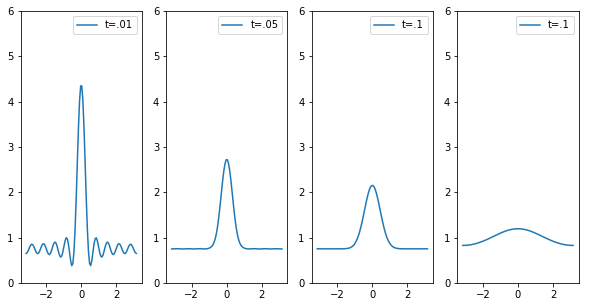

In [5]:
g10 = lambda t,x: 1 + (1/2)*sum([np.exp(-1*(k**2)*t)*np.cos(k*x) for k in range(1,10)])

X = np.linspace(-np.pi, np.pi, 100)

plt.subplot(1,4,1)
plt.plot(X, [g10(0.01,x) for x in X], label="t=.01")
plt.ylim(0,6)
plt.legend()
plt.subplot(1,4,2)
plt.plot(X, [g10(0.05,x) for x in X], label="t=.05")
plt.ylim(0,6)
plt.legend()
plt.subplot(1,4,3)
plt.plot(X, [g10(0.1,x) for x in X], label="t=.1")
plt.ylim(0,6)
plt.legend()
plt.subplot(1,4,4)
plt.plot(X, [g10(1,x) for x in X], label="t=.1")
plt.ylim(0,6)
plt.legend()
plt.show()

## Part 5

The instructions:
>We now can construct the periodic solution to the heat equation in two ways.
 * Since we know $f[u]_k$ we can directly compute the Fourier series.
 * Or we can view the solution as $u = u_0 \ast g$, where $u_0$ is the initial shape and $g$ is the thing we constructed above.
>
>Explain how to interpret each of these perspectives from a physical point of view.

Using the Fourier series approach, we have
\begin{align*}
u(t,x) &= \sum_k f[u_0]_k G_k \Psi_k
\\
&=\sum_k f[u_0]_k e^{-\left( \frac{k\pi}{L}\right)^2t}e^{i\frac{k\pi}{L}x}
\end{align*}
This perspective views $u(t,x)$ as a weighted sum of the periodic eigenfunctions $\Psi_k = e^{i\frac{k\pi}{L}x}$ and thus emphasizes how much of each spatial scale (or "frequency") is present, and how each scale evolves in time.
From the Fourier series expression, we immediately deduce that the finer spatial scales decay much faster than th coarser spatial scales.
Physically, we interpret this perspective as viewing a the heat function as the combination of features at differenc scales.
The fact that the finer scales decay faster we interpret as the heat equation smooths smaller irregularities very quickly, but moves larger chunks of heat much more slowly.

Using the convolution approach, we have $u = u_0\ast g$
$$
u(t,x) = \frac{1}{2L}\int_{-L}^L u_0(y) g(t, x-y)\,dy.
$$
This perspective views $u(t,x)$ as a weighted "sum" (integral) of a collection of "spikes" of heat. 
The spike of heat at location $y$ is given by $u_0(y) g(t,x-y)$, which we interpret as being formed by taking the "standard spike" $g(t,x)$ and first translating it to location $y$ and then weighting it by the amount of initial heat $u_0(y)$ present at that location.
This perspective emphasizes the spatial location of each original piece of heat.
The heat at each location evolves more or less the same - the only difference being the size of the pulse.

We can compare/contrast the two perspectives as follows.
The Fourier series approach emphasizes the varying amount of spatial scales, which we can interpret as emphasizing those regions in frequency space that dominate.
In the short term, most of the change occurs in the high-frequency (fine scale) part of frequency space, while in the long term, the only terms that are sizable are in the low-frequency (coarse scale) region.
The convolution approach, on the other hand, emphasizes the varying physical location of the heat. From this persective, the dominate region of physical space is simply those places where there is initially the most/least heat.

## Part 6

The instructions:
>Choose some "interesting" initial shape $u_0$ and construct the Fourier series solution to the heat equation. Make some plots. Make some intelligent remarks. What do you think?

As an example, here is how one would analyze the situation where $u_0$ is the square wave.

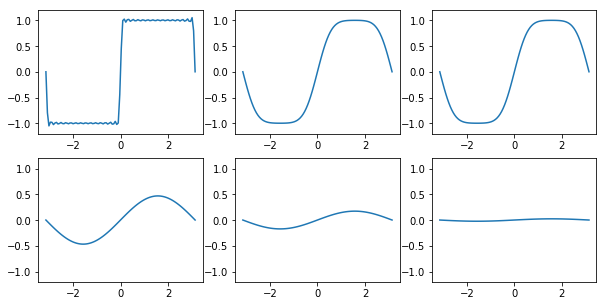

In [8]:
uL = lambda x: -1
uR = lambda x: 1

n = 30

def ar_integrate(func, a, b, h=0.001):
    """Approximates integral using trapazoidal method"""
    return h * ((0.5 * (func(a) + func(b))) + sum(
        [func(a + k * h) for k in range(1, int((b - a) / h))]))

b = lambda k: (1/np.pi)*(integrate.quad(lambda y: np.sin(k*y)*uL(y), -np.pi, 0)[0] +
                         integrate.quad(lambda y: np.sin(k*y)*uR(y), 0, np.pi)[0])
u = lambda t, x: sum([b(k) * np.sin(k*x)*np.exp(-(k**2)*t) for k in range(1,n)])

X = np.linspace(-np.pi, np.pi, 100)

f, ax = plt.subplots(2,3)
ax[0,0].plot(X, [u(0.001, x) for x in X])
ax[0,1].plot(X, [u(0.1,x) for x in X])
ax[0,2].plot(X, [u(0.1,x) for x in X])
ax[1,0].plot(X, [u(1.0,x) for x in X])
ax[1,1].plot(X, [u(2.0,x) for x in X])
ax[1,2].plot(X, [u(4.0,x) for x in X])
for x in range(3):
    for y in range(2):
        ax[y,x].set_ylim(-1.2,1.2)
plt.show()


Here are some "intelligent remarks."

First, notice how the small-scale structure is the first to smooth out. The sharp jumps rely on using a lot of small scale structure, and that's where the changes occur first. As expected, those sharp features smooth very quickly.

Second, the large scale structure takes (relatively) much longer to even out. This also matches our expectation.

Finally, the total amount of heat in the initial shape is zero. This continues to be true for all time, and thus the final equilibrium state is $u=0$.